<a href="https://colab.research.google.com/github/elangbijak4/Time-Series-Research/blob/main/TXMIXER_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

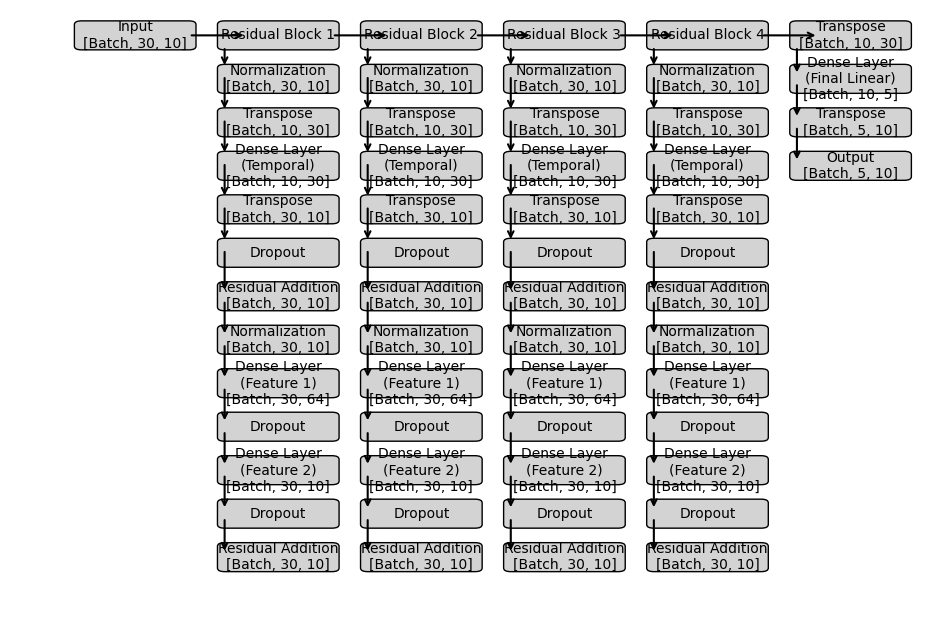

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 8))

def draw_block(x, y, label, width=1.5, height=0.6):
    rect = patches.FancyBboxPatch((x, y), width, height,
                                  boxstyle="round,pad=0.1",
                                  edgecolor='black', facecolor='lightgray')
    ax.add_patch(rect)
    ax.text(x + width / 2, y + height / 2, label,
            horizontalalignment='center', verticalalignment='center', fontsize=10)

# Draw input layer
draw_block(0, 6, 'Input\n[Batch, 30, 10]')

# Draw residual blocks
for i in range(4):
    draw_block(2 + 2 * i, 6, f'Residual Block {i+1}')
    draw_block(2 + 2 * i, 4.8, 'Normalization\n[Batch, 30, 10]')
    draw_block(2 + 2 * i, 3.6, 'Transpose\n[Batch, 10, 30]')
    draw_block(2 + 2 * i, 2.4, 'Dense Layer\n(Temporal)\n[Batch, 10, 30]')
    draw_block(2 + 2 * i, 1.2, 'Transpose\n[Batch, 30, 10]')
    draw_block(2 + 2 * i, 0, 'Dropout')
    draw_block(2 + 2 * i, -1.2, 'Residual Addition\n[Batch, 30, 10]')
    draw_block(2 + 2 * i, -2.4, 'Normalization\n[Batch, 30, 10]')
    draw_block(2 + 2 * i, -3.6, 'Dense Layer\n(Feature 1)\n[Batch, 30, 64]')
    draw_block(2 + 2 * i, -4.8, 'Dropout')
    draw_block(2 + 2 * i, -6, 'Dense Layer\n(Feature 2)\n[Batch, 30, 10]')
    draw_block(2 + 2 * i, -7.2, 'Dropout')
    draw_block(2 + 2 * i, -8.4, 'Residual Addition\n[Batch, 30, 10]')

# Draw final layers
draw_block(10, 6, 'Transpose\n[Batch, 10, 30]')
draw_block(10, 4.8, 'Dense Layer\n(Final Linear)\n[Batch, 10, 5]')
draw_block(10, 3.6, 'Transpose\n[Batch, 5, 10]')
draw_block(10, 2.4, 'Output\n[Batch, 5, 10]')

# Arrows
def draw_arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle="->", lw=1.5))

for i in range(4):
    draw_arrow(1.5 + 2 * i, 6.3, 2.3 + 2 * i, 6.3)
    draw_arrow(2 + 2 * i, 6, 2 + 2 * i, 5.4)
    draw_arrow(2 + 2 * i, 5.2, 2 + 2 * i, 4.2)
    draw_arrow(2 + 2 * i, 4, 2 + 2 * i, 3)
    draw_arrow(2 + 2 * i, 2.8, 2 + 2 * i, 1.8)
    draw_arrow(2 + 2 * i, 1.6, 2 + 2 * i, 0.6)
    draw_arrow(2 + 2 * i, 0.4, 2 + 2 * i, -0.8)
    draw_arrow(2 + 2 * i, -1, 2 + 2 * i, -2)
    draw_arrow(2 + 2 * i, -2.2, 2 + 2 * i, -3.2)
    draw_arrow(2 + 2 * i, -3.4, 2 + 2 * i, -4.4)
    draw_arrow(2 + 2 * i, -4.6, 2 + 2 * i, -5.6)
    draw_arrow(2 + 2 * i, -5.8, 2 + 2 * i, -6.8)
    draw_arrow(2 + 2 * i, -7, 2 + 2 * i, -8)

draw_arrow(9.5, 6.3, 10.3, 6.3)
draw_arrow(10, 6, 10, 5.2)
draw_arrow(10, 5, 10, 4)
draw_arrow(10, 3.8, 10, 2.8)

ax.set_xlim(-1, 12)
ax.set_ylim(-10, 7)
ax.axis('off')
plt.show()